In [1]:
#This Kernel will be used for creating the heatmap

In [2]:
#import all dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import geodatasets
import geopandas
from scipy.stats import pearsonr


In [3]:
# ride_results_df = pd.DataFrame.from_records(ride_results)

input_file_path = "TNP_trips_350K.csv"

# Read the CSV file into the DataFrame
ride_results_df = pd.read_csv(input_file_path)

# Convert column names to snake_case
ride_results_df.columns = ride_results_df.columns.str.lower().str.replace(' ', '_')

ride_results_df

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,5fd670ba8681717af8db2b16fcff532327f164f7,11/12/2022 06:45:00 AM,11/12/2022 07:00:00 AM,542.0,1.5,1.703106e+10,1.703106e+10,6.0,6.0,5.0,...,2.91,7.91,False,1,41.938232,-87.646782,POINT (-87.6467820813 41.938232293),41.938232,-87.646782,POINT (-87.6467820813 41.938232293)
1,0d7c0a816f611efe0d527542cd50e69422306ced,05/31/2022 06:00:00 PM,05/31/2022 06:15:00 PM,847.0,2.8,1.703183e+10,1.703108e+10,28.0,8.0,12.5,...,4.87,20.37,False,1,41.879067,-87.657005,POINT (-87.657005027 41.8790669938),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
2,b7cf20782d69c871cb6bf21a9c5ef9071035f401,10/28/2022 06:45:00 AM,10/28/2022 07:15:00 AM,2143.0,33.6,NaN,1.703198e+10,NaN,76.0,42.5,...,33.20,86.70,False,1,NaN,NaN,NaN,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201)
3,a06fb9215324ffc2cd8a1d7d3e6b30a2b3bac591,08/08/2022 12:30:00 PM,08/08/2022 01:00:00 PM,1949.0,18.0,1.703198e+10,1.703108e+10,76.0,8.0,30.0,...,6.81,43.81,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495)
4,73fd509eae177a619e83d4e42ff6f1cd5537ba94,12/19/2022 08:30:00 PM,12/19/2022 08:30:00 PM,258.0,1.1,1.703107e+10,1.703108e+10,7.0,8.0,5.0,...,4.66,9.66,False,1,41.922083,-87.634156,POINT (-87.6341560931 41.922082541),41.909496,-87.630964,POINT (-87.630963601 41.9094956686)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349995,e1b5bc059358e0e98df3c958d797ca20da50d2ca,03/24/2022 02:45:00 PM,03/24/2022 02:45:00 PM,375.0,1.6,1.703107e+10,1.703108e+10,7.0,8.0,7.5,...,4.66,15.16,False,1,41.922083,-87.634156,POINT (-87.6341560931 41.922082541),41.902788,-87.626146,POINT (-87.6261455896 41.9027880476)
349996,503f67c2e6b08530e32468a8dc544c0cdbd7b883,06/02/2022 02:30:00 PM,06/02/2022 02:45:00 PM,977.0,3.8,NaN,NaN,24.0,23.0,15.0,...,1.28,16.28,False,1,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.900070,-87.720918,POINT (-87.7209182385 41.9000696026)
349997,380e373293d99f6f29c64bd756ba68c7d4602b53,06/04/2022 10:15:00 PM,06/04/2022 10:45:00 PM,1873.0,8.1,NaN,NaN,7.0,60.0,35.0,...,4.44,47.44,False,1,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.836150,-87.648788,POINT (-87.6487879519 41.8361501547)
349998,4db7f98bb304a9262762465d1c5e9a74061c7298,10/19/2022 12:45:00 AM,10/19/2022 12:45:00 AM,251.0,0.9,1.703107e+10,1.703106e+10,7.0,6.0,5.0,...,2.91,7.91,False,1,41.929047,-87.651311,POINT (-87.6513108767 41.9290469366),41.936237,-87.656412,POINT (-87.6564115308 41.9362371791)


In [4]:
input_file_path = "Taxi_trips_32K.csv"

# Read the CSV file into the DataFrame
taxi_results_df = pd.read_csv(input_file_path)

# Convert column names to snake_case
taxi_results_df.columns = taxi_results_df.columns.str.lower().str.replace(' ', '_')

taxi_results_df

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid__location
0,e8489b39a088ebf844047c6b0a676ca9a5173207,41b52039f81d93468b1686459508da86e96d96e6c8d715...,03/16/2022 12:15:00 PM,03/16/2022 12:30:00 PM,480.0,0.00,1.703128e+10,1.703132e+10,28.0,32.0,...,0.0,6.50,Cash,"Taxicab Insurance Agency, LLC",41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,95b89ee2c049cbe96789d762dda9261ba7eec391,a83d0757369e84e2567b6d31793b04221b7087c4f99083...,01/14/2022 11:30:00 AM,01/14/2022 11:45:00 AM,540.0,1.62,1.703108e+10,1.703128e+10,8.0,28.0,...,0.0,12.75,Credit Card,Flash Cab,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)
2,fd6c5e4607ffa204edc835ab552deca30076c432,e8ebe1fb12cc70947d4031ad2982bd07dee6c4a3b7d381...,03/01/2022 01:15:00 AM,03/01/2022 01:15:00 AM,681.0,7.11,NaN,NaN,76.0,17.0,...,5.0,28.00,Credit Card,Flash Cab,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.946511,-87.806020,POINT (-87.8060200025 41.9465114202)
3,5e0120741354f6895623215570f4c60c48852c41,ff214d6d48867d32b43c8caf27613acc83d3a03a290c37...,03/28/2022 02:30:00 PM,03/28/2022 02:45:00 PM,540.0,1.10,NaN,NaN,6.0,6.0,...,0.0,6.75,Cash,Taxi Affiliation Services,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
4,f710aa6f67b51c57410d6546d55ddfe806441814,bf0b987f41a8c368a072da293f9fb1aecc8a39763ab6a4...,12/31/2022 08:15:00 PM,12/31/2022 08:30:00 PM,1484.0,12.19,NaN,NaN,NaN,4.0,...,5.0,44.10,Credit Card,Flash Cab,NaN,NaN,NaN,41.975171,-87.687516,POINT (-87.6875155152 41.9751709433)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32318,06dbbee041b78489690e3392b607732e14cac808,4c658dc5e7ea935f4c3bb9a3071f509efac3e99c93f6a6...,08/17/2022 12:45:00 PM,08/17/2022 01:30:00 PM,2076.0,22.61,NaN,NaN,8.0,NaN,...,0.0,57.53,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
32319,ea327414a034f3d41685add8a8b79a675dcf061b,f2b35bd8a42c347d4a147be4c9b2f6977add46e98e203a...,06/26/2022 07:30:00 AM,06/26/2022 07:45:00 AM,662.0,2.85,1.703108e+10,1.703184e+10,8.0,33.0,...,1.5,15.30,Credit Card,Sun Taxi,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.849247,-87.624135,POINT (-87.6241352979 41.8492467545)
32320,46054fdc86848119afb55f715226b5b5da67163d,4cf389626b3d1df35aef815a964571fd5ea7dddda01e56...,05/19/2022 12:45:00 PM,05/19/2022 01:00:00 PM,832.0,4.45,NaN,NaN,8.0,6.0,...,1.0,15.50,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
32321,374c9a3cf1b47a6b503161272ee281e25a04a24e,3b084cc9045b3afc1c8bb8b5b76921d8e41c00494b15bd...,11/12/2022 05:45:00 PM,11/12/2022 05:45:00 PM,474.0,0.72,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,6.25,Cash,Globe Taxi,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)


In [5]:
taxi_results_df.dtypes

trip_id                        object
taxi_id                        object
trip_start_timestamp           object
trip_end_timestamp             object
trip_seconds                  float64
trip_miles                    float64
pickup_census_tract           float64
dropoff_census_tract          float64
pickup_community_area         float64
dropoff_community_area        float64
fare                          float64
tips                          float64
tolls                         float64
extras                        float64
trip_total                    float64
payment_type                   object
company                        object
pickup_centroid_latitude      float64
pickup_centroid_longitude     float64
pickup_centroid_location       object
dropoff_centroid_latitude     float64
dropoff_centroid_longitude    float64
dropoff_centroid__location     object
dtype: object

In [6]:
rides_by_ca = ride_results_df.groupby('pickup_community_area')['fare'].count()
rides_by_ca

pickup_community_area
1.0      4263
2.0      3057
3.0      7374
4.0      3304
5.0      3587
        ...  
73.0     1100
74.0      295
75.0      885
76.0    16232
77.0     4944
Name: fare, Length: 77, dtype: int64

In [7]:
taxi_by_ca = taxi_results_df.groupby('pickup_community_area')['fare'].count()
taxi_by_ca

pickup_community_area
1.0      196
2.0      219
3.0      514
4.0      146
5.0       86
        ... 
73.0      50
74.0       5
75.0      45
76.0    5010
77.0     366
Name: fare, Length: 77, dtype: int64

/Users/luispineda/anaconda3/envs/dev/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

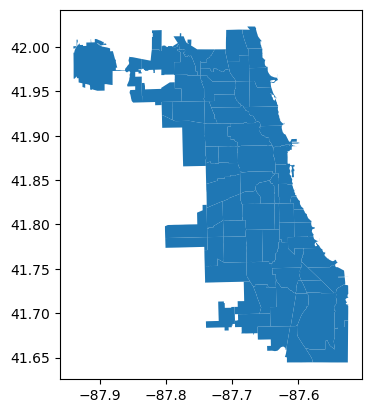

In [8]:
#import Chicago mapping info
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
chicago.plot()

In [9]:
rides_pd=pd.DataFrame({"NID":rides_by_ca.index,"Ride Per Area":rides_by_ca})
rides_pd.head()

,NID,Ride Per Area
pickup_community_area,,
1.0,1.0,4263
2.0,2.0,3057
3.0,3.0,7374
4.0,4.0,3304
5.0,5.0,3587


In [10]:
taxi_pd=pd.DataFrame({"NID":taxi_by_ca.index,"Ride Per Area":taxi_by_ca})
taxi_pd.head()

,NID,Ride Per Area
pickup_community_area,,
1.0,1.0,196
2.0,2.0,219
3.0,3.0,514
4.0,4.0,146
5.0,5.0,86


In [11]:
#Format the columns into integer type so they can be merged with the Chicago Data Frame
rides_pd['NID'] = rides_pd['NID'].astype(int)
taxi_pd['NID'] = taxi_pd['NID'].astype(int)


In [32]:
rides_hm=pd.merge(chicago, rides_pd, on='NID',how='left' )
rides_hm.head()

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry,Ride Per Area
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",2081
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",480
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",275
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",1850
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",1515


In [31]:
taxi_hm=pd.merge(chicago, taxi_pd, on='NID',how='left' )
taxi_hm.head()

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry,Ride Per Area
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",169
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",72
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",51
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",161
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",118


/Users/luispineda/anaconda3/envs/dev/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

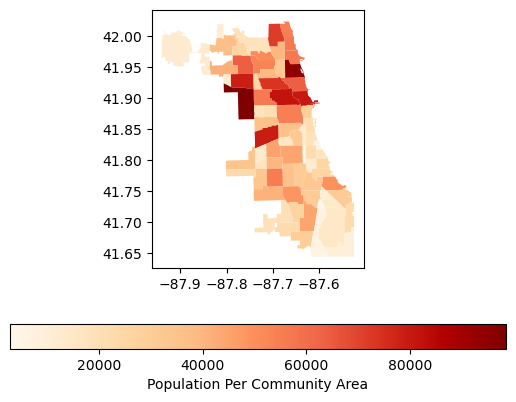

In [14]:
chicago.plot(column="POP2010", 
              legend=True,
              cmap='OrRd',
              legend_kwds={"label": "Population Per Community Area", "orientation": "horizontal"},
)

In [15]:
pop_index = chicago["POP2010"].idxmax()

# Get the corresponding "community" and "NID" values
largest_community = chicago.loc[pop_index, "community"]
largest_nid = chicago.loc[pop_index, "NID"]

print(f"Highest Ride Per Area: {chicago.loc[pop_index, 'POP2010']}")
print(f"Corresponding Community: {largest_community}")
print(f"Corresponding NID: {largest_nid}")

Highest Ride Per Area: 98514
Corresponding Community: AUSTIN
Corresponding NID: 25


/Users/luispineda/anaconda3/envs/dev/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

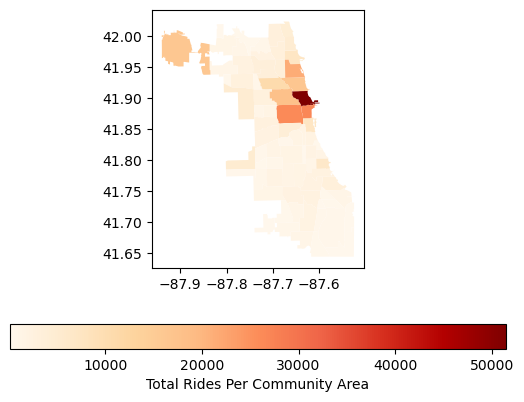

In [35]:
rides_hm.plot(column="Ride Per Area", 
              legend=True,
              cmap='OrRd',
              legend_kwds={"label": "Total Rides Per Community Area", "orientation": "horizontal"},
)


/Users/luispineda/anaconda3/envs/dev/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

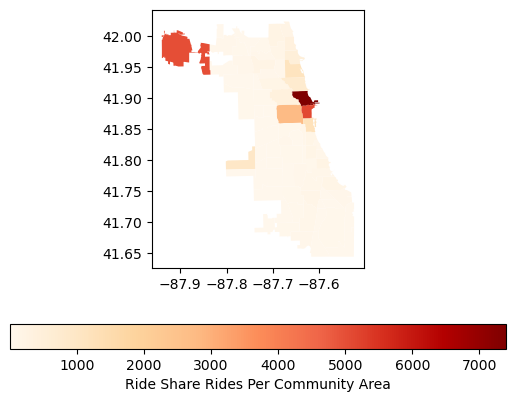

In [17]:
taxi_hm.plot(column="Ride Per Area", 
              legend=True,
              cmap='OrRd',
              legend_kwds={"label": "Ride Share Rides Per Community Area", "orientation": "horizontal"},
)

In [18]:
total_df = rides_by_ca + rides_by_ca
total_df

pickup_community_area
1.0      8526
2.0      6114
3.0     14748
4.0      6608
5.0      7174
        ...  
73.0     2200
74.0      590
75.0     1770
76.0    32464
77.0     9888
Name: fare, Length: 77, dtype: int64

In [19]:
total_pd=pd.DataFrame({"NID":total_df.index,"Ride Per Area":total_df})
total_pd.head()

,NID,Ride Per Area
pickup_community_area,,
1.0,1.0,8526
2.0,2.0,6114
3.0,3.0,14748
4.0,4.0,6608
5.0,5.0,7174


In [20]:
total_pd['NID'] = total_pd['NID'].astype(int)


In [21]:
total_hm=pd.merge(chicago, total_pd, on='NID',how='left' )
total_hm.head()

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry,Ride Per Area
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",4162
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",960
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",550
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",3700
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",3030


In [22]:
highest_index = total_hm["Ride Per Area"].idxmax()

# Get the corresponding "community" and "NID" values
highest_community = total_hm.loc[highest_index, "community"]
highest_nid = total_hm.loc[highest_index, "NID"]

print(f"Highest Ride Per Area: {total_hm.loc[highest_index, 'Ride Per Area']}")
print(f"Corresponding Community: {highest_community}")
print(f"Corresponding NID: {highest_nid}")

Highest Ride Per Area: 102888
Corresponding Community: NEAR NORTH SIDE
Corresponding NID: 8


/Users/luispineda/anaconda3/envs/dev/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

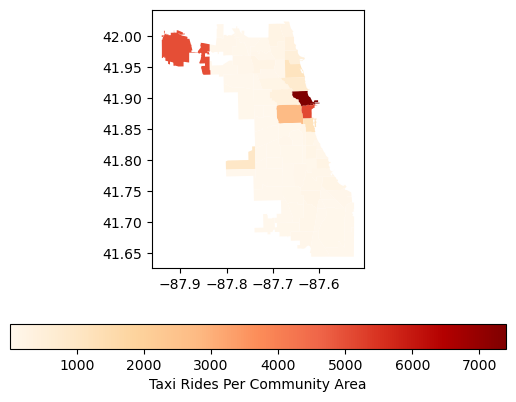

In [23]:
taxi_hm.plot(column="Ride Per Area", 
              legend=True,
              cmap='OrRd',
              legend_kwds={"label": "Taxi Rides Per Community Area", "orientation": "horizontal"},
)

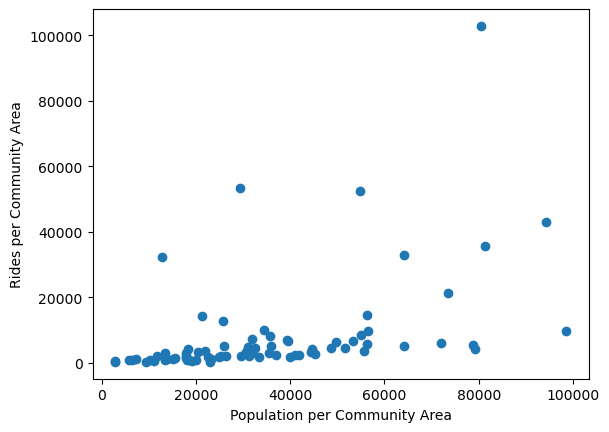

In [24]:
#miles=short_df['trip_miles'].astype(float)
pop=total_hm['POP2010']
rides=total_hm['Ride Per Area']
plt.scatter(pop,rides)
plt.xlabel("Population per Community Area")
plt.ylabel("Rides per Community Area")
plt.show()

In [25]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(pop, rides)


In [26]:
pe_fit = pe_slope * pop + pe_int

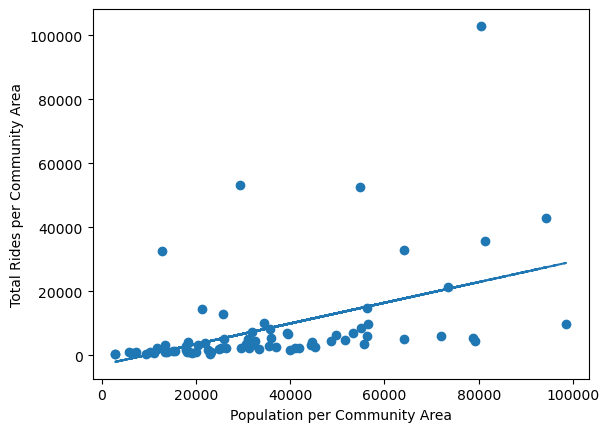

In [27]:
plt.scatter(pop,rides)
plt.plot(pop,pe_fit,"--")
#plt.xticks(miles, rotation=90)
plt.xlabel('Population per Community Area')
plt.ylabel('Total Rides per Community Area')
plt.show()

In [28]:
total_pd.max()

NID                  77
Ride Per Area    102888
dtype: int64

In [29]:
correlation, p_value = pearsonr(pop,rides)
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.4653007338448706
P-value: 2.0096083223597486e-05


In [30]:
#We assumed that the number of rides would be higher in areas with higher populations 
#as that would mean that there are more customers to take rides

#For the most part that assumptions seems to be correct for the most part.

#A pretty significant outlier in this case is Community Area 77